# Create virtual environment

step 1 - Open anaconda prompt
step 2 - run the command "conda create -n <env_name>"
step 3 - activate conda "conda activate <env_name>"

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
import tensorflow as tf 

In [68]:
cust_churn = pd.read_csv(r'C:\Users\jiten\Downloads\archive (5)\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [69]:
cust_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [70]:
cust_churn.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


# check for the null data

In [71]:
cust_churn.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [72]:
cust_churn[cust_churn.TotalCharges == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [73]:
cust_churn[cust_churn.TotalCharges == " "].shape

(11, 21)

# remove the null data from the dataframe

In [74]:
cust_churn.drop(cust_churn[cust_churn.TotalCharges == " "].index,axis=0,inplace=True)

In [75]:
cust_churn[cust_churn.TotalCharges == " "].shape

(0, 21)

In [76]:
#cust_churn[~cust_churn[cust_churn.TotalCharges == " "]]

# remove the redundant column Customer ID

In [77]:
cust_churn.drop('customerID',axis=1,inplace=True)

In [78]:
cust_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [79]:
cust_churn.select_dtypes('object')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6,Yes


In [80]:
cust_churn.TotalCharges = cust_churn.TotalCharges.astype('float64')
#cust_churn.TotalCharges = pd.to_numeric(cust_churn.TotalCharges)

In [81]:
for col in cust_churn.select_dtypes('object').columns:
    print(f'{col} :',cust_churn[col].unique())

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [82]:
cols = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

In [83]:
# approach 1
for i in cols:
    cust_churn[i] = cust_churn[i].str.replace('No internet service','No')

"for i in cols:\n    cust_churn[i] = cust_churn[i].str.replace('No internet service','No')"

In [87]:
# approach 2
#cust_churn.replace('No internet service','No',regex=True,inplace=True)

In [88]:
cust_churn.OnlineBackup.unique()

array(['Yes', 'No'], dtype=object)

In [90]:
cust_churn.MultipleLines.replace('No phone service','No',inplace=True)

In [91]:
for col in cust_churn.select_dtypes('object').columns:
    print(f'{col} :',cust_churn[col].unique())

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [92]:
map_value = {'Yes':1,'No':0}

In [93]:
col_yes_no = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
              'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [104]:
for col in col_yes_no:
    cust_churn[col] = cust_churn[col].map(map_value)

In [105]:
cust_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [106]:
for col in cust_churn.select_dtypes('object').columns:
    print(f'{col} :',cust_churn[col].unique())

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [107]:
cust_churn = pd.get_dummies(cust_churn, columns=['gender','InternetService','Contract','PaymentMethod'], drop_first=True)

In [108]:
cust_churn.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0,0,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,1,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,0,0,0,0,1
3,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,1,0,0,0,0
4,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,0,0,0,1,0


In [111]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


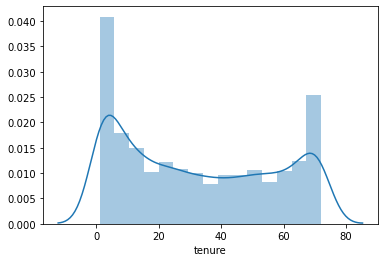

In [112]:
sns.distplot(cust_churn.tenure)

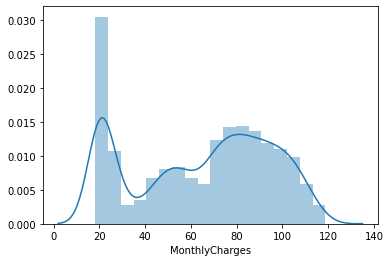

In [113]:
sns.distplot(cust_churn.MonthlyCharges)

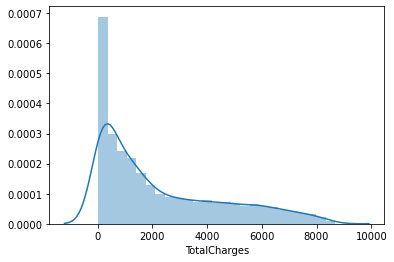

In [114]:
sns.distplot(cust_churn.TotalCharges)

In [117]:
cust_churn.TotalCharges = np.log(cust_churn.TotalCharges)

In [118]:
min_max = MinMaxScaler(feature_range=(0,10))

In [121]:
cust_churn[['tenure','MonthlyCharges']] = min_max.fit_transform(cust_churn[['tenure','MonthlyCharges']])

In [122]:
cust_churn.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0.000000,0,0,0,1,0,0,0,0,1,1.154229,3.396185,0,0,0,0,0,0,0,1,0
1,0,0,0,4.647887,1,0,1,0,1,0,0,0,0,3.850746,7.544068,0,1,0,0,1,0,0,0,1
2,0,0,0,0.140845,1,0,1,1,0,0,0,0,1,3.542289,4.683519,1,1,0,0,0,0,0,0,1
3,0,0,0,6.197183,0,0,1,0,1,1,0,0,0,2.393035,7.517928,0,1,0,0,1,0,0,0,0
4,0,0,0,0.140845,1,0,0,0,0,0,0,0,1,5.218905,5.021575,1,0,1,0,0,0,0,1,0


In [123]:
cust_churn.dtypes

SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                   float64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
gender_Male                                uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
Contract_One year                          uint8
Contract_Two year   

In [125]:
X =  cust_churn.drop('Churn',axis=1)
Y = cust_churn.Churn

x_train, x_test ,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=12)

In [127]:
x_train.shape

(5625, 23)

# Build Neural Network

In [133]:
model = Sequential()

In [134]:
model.add(Dense(23,input_shape=(23,),activation='relu')) # first hidden layer with input layer

In [135]:
model.add(Dropout(0.2)) # create drop out layer

In [136]:
model.add(Dense(15,activation = 'relu')) # second hidden layer

In [137]:
model.add(Dropout(0.2))

In [138]:
model.add(Dense(1, activation = 'sigmoid')) # output layer

In [139]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 23)                552       
_________________________________________________________________
dropout_2 (Dropout)          (None, 23)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 15)                360       
_________________________________________________________________
dropout_3 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 16        
Total params: 928
Trainable params: 928
Non-trainable params: 0
_________________________________________________________________


# compile the model

In [141]:
model.compile(optimizer='adam' , loss='binary_crossentropy', metrics='accuracy')

In [144]:
model.fit(x_train,y_train , validation_data=(x_test,y_test), epochs= 500, verbose=1)

Epoch 1/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3945 - accuracy: 0.8128 - val_loss: 0.4260 - val_accuracy: 0.8074
Epoch 2/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3870 - accuracy: 0.8180 - val_loss: 0.4286 - val_accuracy: 0.8095
Epoch 3/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3830 - accuracy: 0.8183 - val_loss: 0.4356 - val_accuracy: 0.8038
Epoch 4/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3842 - accuracy: 0.8219 - val_loss: 0.4271 - val_accuracy: 0.8031
Epoch 5/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3847 - accuracy: 0.8165 - val_loss: 0.4347 - val_accuracy: 0.7960
Epoch 6/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3823 - accuracy: 0.8220 - val_loss: 0.4327 - val_accuracy: 0.8045
Epoch 7/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3832 - accuracy: 0.8219 - val_loss: 0.4308 - val_accuracy: 0.8010

176/176 [==============================] - 0s 1ms/step - loss: 0.3785 - accuracy: 0.8238 - val_loss: 0.4407 - val_accuracy: 0.8045
Epoch 58/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3769 - accuracy: 0.8236 - val_loss: 0.4490 - val_accuracy: 0.8017
Epoch 59/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3826 - accuracy: 0.8190 - val_loss: 0.4405 - val_accuracy: 0.8031
Epoch 60/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3825 - accuracy: 0.8199 - val_loss: 0.4470 - val_accuracy: 0.8038
Epoch 61/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3803 - accuracy: 0.8249 - val_loss: 0.4406 - val_accuracy: 0.8053
Epoch 62/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3775 - accuracy: 0.8281 - val_loss: 0.4424 - val_accuracy: 0.8003
Epoch 63/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3805 - accuracy: 0.8212 - val_loss: 0.4454 - val_accuracy: 0.8031
Epoch

Epoch 114/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3777 - accuracy: 0.8222 - val_loss: 0.4624 - val_accuracy: 0.8010
Epoch 115/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3781 - accuracy: 0.8292 - val_loss: 0.4518 - val_accuracy: 0.8031
Epoch 116/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3775 - accuracy: 0.8249 - val_loss: 0.4533 - val_accuracy: 0.8117
Epoch 117/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3731 - accuracy: 0.8249 - val_loss: 0.4595 - val_accuracy: 0.8074
Epoch 118/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3763 - accuracy: 0.8274 - val_loss: 0.4594 - val_accuracy: 0.8067
Epoch 119/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3740 - accuracy: 0.8263 - val_loss: 0.4640 - val_accuracy: 0.8038
Epoch 120/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3732 - accuracy: 0.8263 - val_loss: 0.4601 - val_ac

176/176 [==============================] - 0s 1ms/step - loss: 0.3744 - accuracy: 0.8288 - val_loss: 0.4888 - val_accuracy: 0.8024
Epoch 171/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3784 - accuracy: 0.8261 - val_loss: 0.4830 - val_accuracy: 0.8109
Epoch 172/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3733 - accuracy: 0.8260 - val_loss: 0.4752 - val_accuracy: 0.8038
Epoch 173/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3688 - accuracy: 0.8281 - val_loss: 0.4804 - val_accuracy: 0.8031
Epoch 174/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3731 - accuracy: 0.8290 - val_loss: 0.4814 - val_accuracy: 0.8060
Epoch 175/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3751 - accuracy: 0.8252 - val_loss: 0.4882 - val_accuracy: 0.7996
Epoch 176/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3741 - accuracy: 0.8258 - val_loss: 0.4826 - val_accuracy: 0.8010

176/176 [==============================] - 0s 1ms/step - loss: 0.3740 - accuracy: 0.8245 - val_loss: 0.4724 - val_accuracy: 0.8045
Epoch 227/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3692 - accuracy: 0.8288 - val_loss: 0.4755 - val_accuracy: 0.8024
Epoch 228/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3711 - accuracy: 0.8295 - val_loss: 0.5098 - val_accuracy: 0.8045
Epoch 229/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3729 - accuracy: 0.8274 - val_loss: 0.4934 - val_accuracy: 0.8038
Epoch 230/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3715 - accuracy: 0.8260 - val_loss: 0.4972 - val_accuracy: 0.8060
Epoch 231/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3706 - accuracy: 0.8261 - val_loss: 0.4897 - val_accuracy: 0.8003
Epoch 232/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3742 - accuracy: 0.8293 - val_loss: 0.4811 - val_accuracy: 0.8031

176/176 [==============================] - 0s 1ms/step - loss: 0.3704 - accuracy: 0.8265 - val_loss: 0.5122 - val_accuracy: 0.7982
Epoch 283/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3720 - accuracy: 0.8231 - val_loss: 0.5045 - val_accuracy: 0.8003
Epoch 284/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3708 - accuracy: 0.8252 - val_loss: 0.5062 - val_accuracy: 0.7989
Epoch 285/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3688 - accuracy: 0.8295 - val_loss: 0.4871 - val_accuracy: 0.8045
Epoch 286/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3728 - accuracy: 0.8252 - val_loss: 0.4918 - val_accuracy: 0.7996
Epoch 287/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3748 - accuracy: 0.8265 - val_loss: 0.5054 - val_accuracy: 0.8031
Epoch 288/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3702 - accuracy: 0.8249 - val_loss: 0.5167 - val_accuracy: 0.7967

176/176 [==============================] - 0s 1ms/step - loss: 0.3692 - accuracy: 0.8309 - val_loss: 0.5206 - val_accuracy: 0.8031
Epoch 339/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3753 - accuracy: 0.8284 - val_loss: 0.5087 - val_accuracy: 0.8045
Epoch 340/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3723 - accuracy: 0.8292 - val_loss: 0.5143 - val_accuracy: 0.8024
Epoch 341/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3717 - accuracy: 0.8242 - val_loss: 0.5269 - val_accuracy: 0.8060
Epoch 342/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3724 - accuracy: 0.8265 - val_loss: 0.5199 - val_accuracy: 0.8017
Epoch 343/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3685 - accuracy: 0.8220 - val_loss: 0.5262 - val_accuracy: 0.8024
Epoch 344/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3666 - accuracy: 0.8318 - val_loss: 0.5027 - val_accuracy: 0.8038

176/176 [==============================] - 0s 1ms/step - loss: 0.3645 - accuracy: 0.8320 - val_loss: 0.5269 - val_accuracy: 0.8017
Epoch 395/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3691 - accuracy: 0.8322 - val_loss: 0.5346 - val_accuracy: 0.7974
Epoch 396/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3691 - accuracy: 0.8329 - val_loss: 0.5288 - val_accuracy: 0.7989
Epoch 397/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3724 - accuracy: 0.8217 - val_loss: 0.5319 - val_accuracy: 0.8081
Epoch 398/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3691 - accuracy: 0.8286 - val_loss: 0.5411 - val_accuracy: 0.7967
Epoch 399/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3677 - accuracy: 0.8279 - val_loss: 0.5110 - val_accuracy: 0.8038
Epoch 400/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3677 - accuracy: 0.8254 - val_loss: 0.5371 - val_accuracy: 0.8003

176/176 [==============================] - 0s 1ms/step - loss: 0.3711 - accuracy: 0.8267 - val_loss: 0.5387 - val_accuracy: 0.7932
Epoch 451/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3670 - accuracy: 0.8295 - val_loss: 0.5106 - val_accuracy: 0.7967
Epoch 452/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3683 - accuracy: 0.8290 - val_loss: 0.5484 - val_accuracy: 0.7946
Epoch 453/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3672 - accuracy: 0.8341 - val_loss: 0.5346 - val_accuracy: 0.7974
Epoch 454/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3661 - accuracy: 0.8309 - val_loss: 0.5316 - val_accuracy: 0.8024
Epoch 455/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3664 - accuracy: 0.8311 - val_loss: 0.5371 - val_accuracy: 0.8017
Epoch 456/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3690 - accuracy: 0.8258 - val_loss: 0.5300 - val_accuracy: 0.7982

In [151]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [157]:
x_train

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6701,0,1,1,3.802817,1,0,0,1,1,0,1,1,0,8.169154,7.937017,1,1,0,1,0,0,0,0
5373,0,1,0,9.859155,1,0,0,1,1,1,1,1,1,8.656716,8.894499,1,1,0,0,1,0,1,0
1234,0,0,1,7.464789,1,0,1,1,0,1,1,1,1,8.716418,8.670198,1,1,0,1,0,0,1,0
4191,0,1,0,8.732394,1,1,0,1,1,1,1,1,1,9.004975,8.835167,0,1,0,0,0,0,1,0
3104,1,0,0,1.126761,1,1,0,0,0,0,0,0,1,5.552239,6.519811,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3720,0,0,0,5.774648,1,0,1,0,1,0,0,0,0,3.611940,7.805902,0,0,0,0,0,1,0,0
3330,1,0,0,7.042254,1,1,0,0,1,0,1,1,1,7.915423,8.499701,1,1,0,0,0,0,1,0
1419,0,1,1,8.732394,1,0,0,0,0,0,0,0,1,0.089552,7.070767,1,0,1,0,1,0,0,1
5796,0,1,1,6.478873,0,0,1,1,1,0,1,1,1,4.154229,7.926115,0,0,0,0,1,1,0,0


In [161]:
confusion_matrix(y_test , model.predict_classes(x_test))

C:\Users\jiten\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[932, 130],
       [158, 187]], dtype=int64)

In [175]:
confusion_matrix(y_test ,model.predict(x_test) > 0.2)

array([[723, 339],
       [ 66, 279]], dtype=int64)

In [176]:
precision_score(y_test ,model.predict(x_test) > 0.2)

0.45145631067961167

In [177]:
recall_score(y_test ,model.predict(x_test) > 0.2)

0.808695652173913